In [1]:
# Library
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Supervised Learning
from sklearn.tree import DecisionTreeClassifier

# Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Pembacaan Dataset
dataset = pd.read_csv("../Dataset/dataset_heart.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df = dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# Rename the columns for better readability
df.columns = ['Age', 'Sex', 'CheastPainType', 'RestingBP', 
              'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]

In [6]:
df.head()

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Shape of dataset
df.shape

(1025, 14)

In [8]:
df.isnull().sum()

Age                0
Sex                0
CheastPainType     0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64

In [9]:
df_dup = df.duplicated().any()
df_dup

True

In [10]:
df = df.drop_duplicates()
df_dup = df.duplicated().any()
df_dup

False

In [11]:
df.shape

(302, 14)

In [12]:
cate_val = []
cont_val = []
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
cate_val

['Sex',
 'CheastPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'NumMajorVessels',
 'Thal',
 'Target']

In [13]:
cont_val

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

<Axes: >

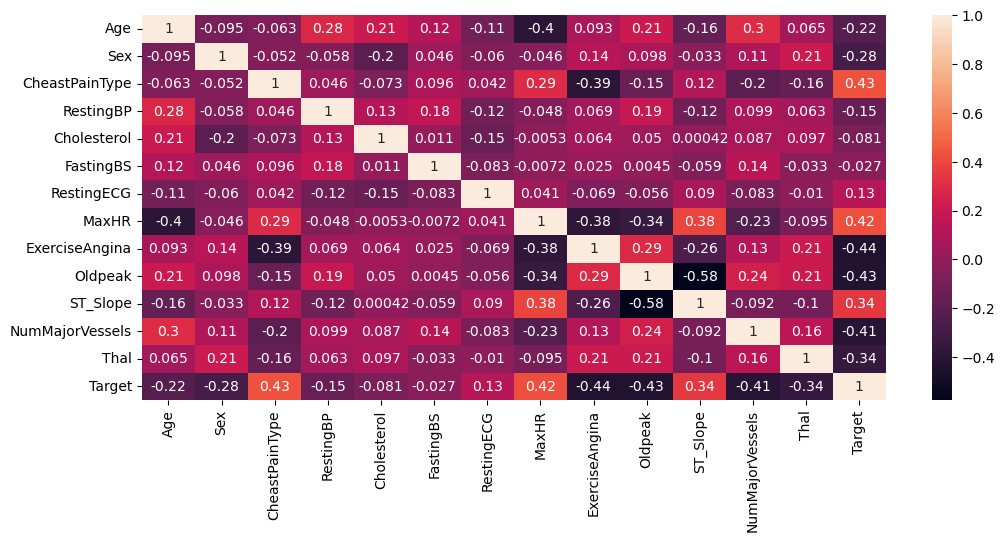

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Set cFeatures and Labels
x = df[['Age', 'Sex', 'CheastPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]].values
y = df["Target"].values

In [16]:
print(x[:5,:])

[[ 52.    1.    0.  125.  212.    0.    1.  168.    0.    1.    2.    2.
    3.    0. ]
 [ 53.    1.    0.  140.  203.    1.    0.  155.    1.    3.1   0.    0.
    3.    0. ]
 [ 70.    1.    0.  145.  174.    0.    1.  125.    1.    2.6   0.    0.
    3.    0. ]
 [ 61.    1.    0.  148.  203.    0.    1.  161.    0.    0.    2.    1.
    3.    0. ]
 [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9   1.    3.
    2.    0. ]]


In [17]:
print(y[1:10])

[0 0 0 0 1 0 0 0 0]


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1) )
scaled = scaler.fit_transform(x)

In [19]:
scaled[:5,:]

array([[0.47916667, 1.        , 0.        , 0.29245283, 0.19634703,
        0.        , 0.5       , 0.74045802, 0.        , 0.16129032,
        1.        , 0.5       , 1.        , 0.        ],
       [0.5       , 1.        , 0.        , 0.43396226, 0.17579909,
        1.        , 0.        , 0.64122137, 1.        , 0.5       ,
        0.        , 0.        , 1.        , 0.        ],
       [0.85416667, 1.        , 0.        , 0.48113208, 0.10958904,
        0.        , 0.5       , 0.41221374, 1.        , 0.41935484,
        0.        , 0.        , 1.        , 0.        ],
       [0.66666667, 1.        , 0.        , 0.50943396, 0.17579909,
        0.        , 0.5       , 0.6870229 , 0.        , 0.        ,
        1.        , 0.25      , 1.        , 0.        ],
       [0.6875    , 0.        , 0.        , 0.41509434, 0.38356164,
        1.        , 0.5       , 0.26717557, 0.        , 0.30645161,
        0.5       , 0.75      , 0.66666667, 0.        ]])

In [20]:
trainX, testX, trainY, testY = train_test_split(
    scaled, y, train_size=0.8, test_size=0.2, random_state=7, shuffle=True
)

In [21]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(241, 14) (241,)
(61, 14) (61,)


In [22]:
result_C45 = DecisionTreeClassifier(criterion="entropy", random_state=None).fit(trainX, trainY).predict(testX)

In [23]:
conf_C45 = confusion_matrix(testY, result_C45)
conf_C45

array([[29,  0],
       [ 0, 32]], dtype=int64)

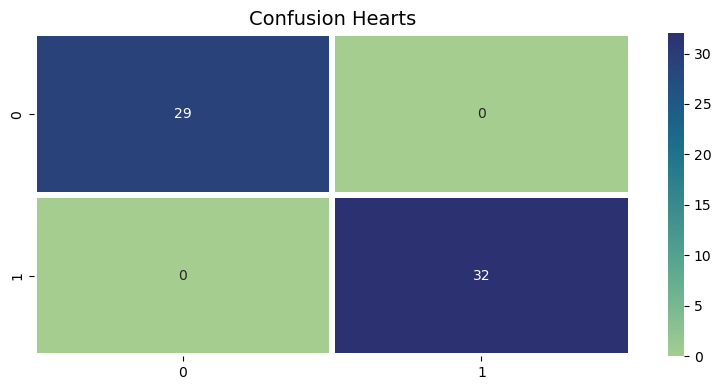

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(conf_C45, annot=True,  cmap="crest", linewidths=3)
# Set Label
ax.set_title("Confusion Hearts", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(False)

# Show Plot
plt.tight_layout()
plt.show()

In [25]:
print(classification_report(y_true=testY, y_pred=result_C45))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

